In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

#Excluimos la columna target y la columna ID porque es irrelevante
xTrain = train.drop(['Target', 'ID'], axis=1)
yTrain = train['Target']

print(xTrain.isnull().sum())
print(yTrain.isnull().sum())
print(test.isnull().sum())

Distributor       0
Product           0
Duration          0
Destination       0
Sales             0
Commission        0
Gender         4704
Age               0
dtype: int64
0
ID                0
Distributor       0
Product           0
Duration          0
Destination       0
Sales             0
Commission        0
Gender         1494
Age               0
dtype: int64


In [ ]:
xTrain = xTrain.fillna(xTrain.Gender.mode()[0])
test = test.fillna(test.Gender.mode()[0])

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(xTrain, yTrain)
mi_scores = pd.Series(mi_scores, name="Mutual Information", index=xTrain.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores)

Distributor    0.031434
Product        0.027330
Duration       0.026882
Commission     0.019950
Sales          0.016819
Destination    0.016084
Age            0.000734
Gender         0.000000
Name: Mutual Information, dtype: float64


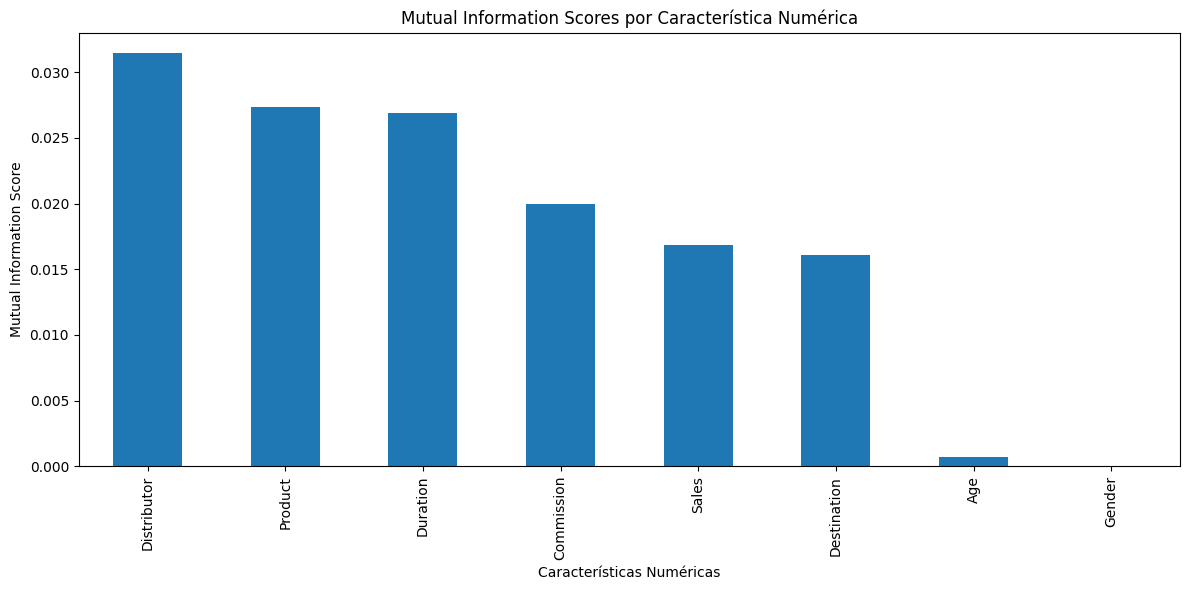

In [ ]:
#Ahora imprimámoslo en una gráfica
plt.figure(figsize=(12, 6)) # Opcional: ajustar el tamaño de la figura
mi_scores.plot(kind='bar')
plt.title("Mutual Information Scores por Característica Numérica")
plt.ylabel("Mutual Information Score")
plt.xlabel("Características Numéricas")
plt.xticks(rotation=90) # Rotar las etiquetas del eje x para mejor lectura si son largas
plt.tight_layout() # Ajustar el diseño para evitar que las etiquetas se solapen
plt.show() # Mostrar el gráfico

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Define el modelo secuencial
modelo = tf.keras.Sequential([
    # Capa de entrada (ajusta units según el número de neuronas que desees en la primera capa oculta)
    # input_shape debe ser el número de características en tus datos de entrenamiento (X_train_scaled)
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(xTrain.shape[1],)),
    # Puedes añadir más capas ocultas si es necesario
    tf.keras.layers.Dense(units=64, activation='relu'),
    # Capa de salida para regresión. units=1 porque estás prediciendo un único valor (SalePrice).
    # No se usa función de activación en la capa de salida para regresión lineal.
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.004),
               loss='binary_crossentropy',
               metrics=["accuracy"])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


# Imprime un resumen del modelo
modelo.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrena el modelo
# epochs=100: El número máximo de épocas. Early Stopping puede detener el entrenamiento antes.
# batch_size=32: El tamaño del lote de datos por cada paso de entrenamiento.
# validation_split=0.2: Usa el 20% de los datos de entrenamiento para validación.
history = modelo.fit(
    xTrain,
    yTrain,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping] # Pasa el callback de Early Stopping aquí
)

Epoch 1/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9308 - loss: 0.7766 - val_accuracy: 0.9570 - val_loss: 0.1707
Epoch 2/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9454 - loss: 0.1979 - val_accuracy: 0.9555 - val_loss: 0.1814
Epoch 3/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9538 - loss: 0.1748 - val_accuracy: 0.9570 - val_loss: 0.1583
Epoch 4/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9527 - loss: 0.1725 - val_accuracy: 0.9570 - val_loss: 0.1486
Epoch 5/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9505 - loss: 0.1734 - val_accuracy: 0.9570 - val_loss: 0.1495
Epoch 6/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9530 - loss: 0.1624 - val_accuracy: 0.9570 - val_loss: 0.1491
Epoch 7/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9493 - loss: 0.1704 - val_accuracy: 0.9540 - val_loss: 0.1879
Epoch 8/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9523 - loss: 0.1649 - val_accuracy: 0.

In [19]:
predicciones = modelo.predict(test.drop('ID', axis=1))
predicciones = predicciones.flatten()

predicciones = [1 if x > 0.5 else 0 for x in predicciones]

submission_df = pd.DataFrame({'ID': test['ID'], 'Target': predicciones})

submission_df.to_csv('sample_submission.csv', index=False)


print("Archivo 'sample_submission.csv' creado exitosamente.")
display(submission_df.head())
print(len(submission_df))

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Archivo 'sample_submission.csv' creado exitosamente.


,ID,Target
0,fffe31003600330038003500,0
1,fffe33003600300031003400,0
2,fffe320033003300,0
3,fffe390039003800,0
4,fffe3500350031003000,0


2164
